In [1]:
data_fld = r'\\192.168.0.127\Raw_data\Van\6_12_2023__VanReview_DropletHeartMI_S2'

In [2]:
import sys,os
sys.path.append(os.path.dirname(os.path.abspath('')))
from ioMicro import *

In [ ]:
glob.glob()

In [5]:
glob.glob(r'\\192.168.0.127\Raw_data\Van\6_12_2023__VanReview_DropletHeartMI_S2\A1_*')

['\\\\192.168.0.127\\Raw_data\\Van\\6_12_2023__VanReview_DropletHeartMI_S2\\A1_lamA_nup98__set1',
 '\\\\192.168.0.127\\Raw_data\\Van\\6_12_2023__VanReview_DropletHeartMI_S2\\A1_lamA_nup98__set2']

In [8]:
fl_target = glob.glob(r'\\192.168.0.127\Raw_data\Van\6_12_2023__VanReview_DropletHeartMI_S2\test\*.zarr')[0]

In [15]:
imT,xT,yT = read_im(fl_target,return_pos=True)

In [17]:
fls = glob.glob(r'//192.168.0.127/Raw_data/Van/6_12_2023__VanReview_DropletHeartMI_S2/H1_MER__set*/*.zarr')

In [18]:
X = []
for fl in fls:
    im,x,y = read_im(fl,return_pos=True)
    X.append([x,y])

In [19]:
X = np.array(X)

In [26]:
ibest = np.argmin(np.sum(np.abs(X-[xT,yT]),axis=-1))
print(fls[ibest])

//192.168.0.127/Raw_data/Van/6_12_2023__VanReview_DropletHeartMI_S2\H1_MER__set2\Conv_zscan__110.zarr


In [2]:
import sys,os
sys.path.append(os.path.dirname(os.path.abspath('')))
from worker_DNA_VAN import *

In [3]:
main_f(['_set2',110],try_mode=False)

Computing fitting on: Conv_zscan__110.zarr
25 ['\\\\192.168.0.127\\Raw_data\\Van\\6_12_2023__VanReview_DropletHeartMI_S2\\H1_Q1-2-3__set2', '\\\\192.168.0.127\\Raw_data\\Van\\6_12_2023__VanReview_DropletHeartMI_S2\\H1_MER__set2', '\\\\192.168.0.127\\Raw_data\\Van\\6_12_2023__VanReview_DropletHeartMI_S2\\H2_Q4-5-6__set2', '\\\\192.168.0.127\\Raw_data\\Van\\6_12_2023__VanReview_DropletHeartMI_S2\\H2_MER__set2', '\\\\192.168.0.127\\Raw_data\\Van\\6_12_2023__VanReview_DropletHeartMI_S2\\H3_Q10-11-12__set2', '\\\\192.168.0.127\\Raw_data\\Van\\6_12_2023__VanReview_DropletHeartMI_S2\\H3_MER__set2', '\\\\192.168.0.127\\Raw_data\\Van\\6_12_2023__VanReview_DropletHeartMI_S2\\H4_Q13-14-15__set2', '\\\\192.168.0.127\\Raw_data\\Van\\6_12_2023__VanReview_DropletHeartMI_S2\\H4_MER__set2', '\\\\192.168.0.127\\Raw_data\\Van\\6_12_2023__VanReview_DropletHeartMI_S2\\H5_MER__set2', '\\\\192.168.0.127\\Raw_data\\Van\\6_12_2023__VanReview_DropletHeartMI_S2\\H5_Q16-17-18__set2', '\\\\192.168.0.127\\Raw_data\

100%|█████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 413.98it/s]


Computing drift on: Conv_zscan__110.zarr
Not completed


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:11<00:00, 83.98s/it]


Unfolded molecules: 116.19816970825195
Computed the decoding: 213.79099321365356


100%|███████████████████████████████████████████████████████████████████| 37697913/37697913 [06:37<00:00, 94801.92it/s]


Computed best unique assigment: 406.5574929714203


['_set2', 110]

In [10]:
import sys,os
sys.path.append(os.path.dirname(os.path.abspath('')))
from ioMicro import *

save_folder = r'\\192.168.0.127\Raw_data\Van\6_12_2023__VanReview_DropletHeartMI_S2\MERFISH_Analysis'
fov,set_ = 'Conv_zscan__110','_set2'
dec = decoder_simple(save_folder,fov,set_)
dec.load_decoded()

Loaded decoded: -4.8081748485565186


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:07<00:00,  6.50it/s]


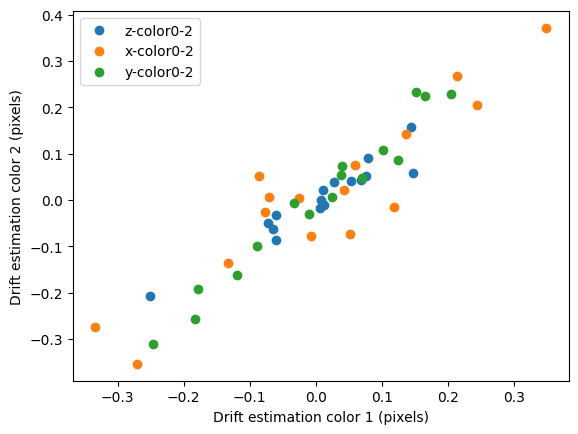

In [11]:
apply_fine_drift(dec,plt_val=True,npts=20000)

In [12]:
dec.XH_pruned[:,:,-3]
H = np.mean(dec.XH_pruned[:,:,-3],axis=1)
keep = H>15000
dec.XH_pruned = dec.XH_pruned[keep]
dec.icodesN = dec.icodesN[keep]

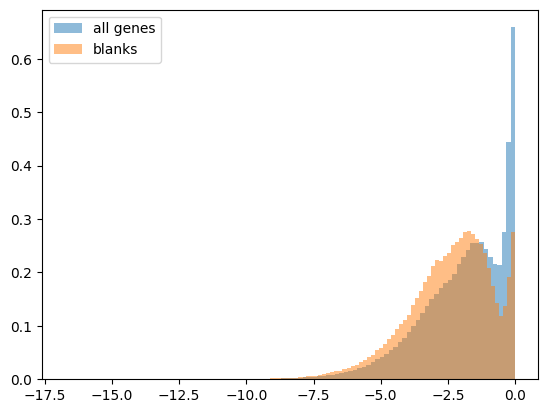

In [13]:
dec.ncols=3
scoresRef = get_score_per_color(dec)
get_score_withRef(dec,scoresRef,plt_val=True,gene=None,iSs = None)

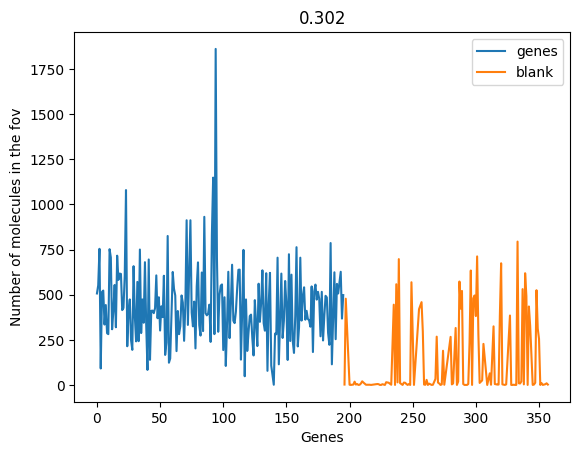

In [24]:
dec.th=-0.25
plot_statistics(dec)

In [34]:
import napari
v = napari.Viewer()
gns = [gn for gn in dec.gns_names if ':' in gn if gn.split(':')[1]=='X']
v = plot_multigenes(dec,genes=gns,colors=['r'],viewer = v,
                         smin=0,smax=5)
gns = [gn for gn in dec.gns_names if ':' in gn if gn.split(':')[1]=='1']
v = plot_multigenes(dec,genes=gns,colors=['b'],viewer = v,
                         smin=0,smax=5)
gns = [gn for gn in dec.gns_names if ':' in gn if gn.split(':')[1]=='2']
v = plot_multigenes(dec,genes=gns,colors=['g'],viewer = v,
                         smin=0,smax=5)

In [49]:
def plot_multigenes(self,genes=['Gad1','Sox9'],colors=['r','g','b','m','c','y','w'],smin=3,smax=10,viewer = None,
                    drift=[0,0,0],resc=[1,1,1]):
    icodesN,XH_pruned = self.icodesN,self.XH_pruned
    scoreA=self.scoreA
    th=self.th
    gns_names = list(self.gns_names)
    
    Xcms = np.mean(XH_pruned,axis=1)
    keep = scoreA>th
    X = (Xcms[:,:3][keep]-drift)/resc  
    H = scoreA[keep]
    H = Xcms[keep,-3]               
    H = np.log(H-np.min(H)+1)
    icodesf = icodesN[keep]
    size = smin+np.clip(H/np.max(H),0,1)*(smax-smin)
    
    if viewer is None:
        import napari
        viewer = napari.Viewer()
    for igene,gene in enumerate(genes):
        color= colors[igene%len(colors)]
        icode = gns_names.index(gene)
        is_code = icode==icodesf
        viewer.add_points(X[is_code],size=size[is_code],face_color=color,name=gene,shading='spherical',edge_width=0)

    return viewer

Xchrs = [gn.split(':')[1] for gn in dec.gns_names if ':' in gn]
Xchrs =[str(i+1) for i in np.arange(19)]+['X']
v = plot_multigenes(dec,genes=gns,colors=['g'],viewer = None,
                         smin=0,smax=5,)

In [65]:
np.savez('temp.npz',XH_pruned=dec.XH_pruned,icodesN=dec.icodesN,scoreA=dec.scoreA,gns_names = dec.gns_names,th=dec.th,ncols=dec.ncols)

In [63]:
gns_all = [gn for gn in dec.gns_names if ':' in gn]
gen_id = [Xchrs.index(gn.split(':')[1])*10**10+int(gn.split(':')[-1])for gn in gns_all]
oids = np.argsort(gen_id)
from matplotlib import cm as cmap
cols = cmap.rainbow(np.linspace(0,1,len(oids))[oids])[:,:3]

v = plot_multigenes(dec,genes=gns_all,colors=cols,viewer = None,
                         smin=0,smax=5)

C:\Users\ClevelandLab\anaconda3\envs\napari\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
C:\Users\ClevelandLab\anaconda3\envs\napari\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
C:\Users\ClevelandLab\anaconda3\envs\napari\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
C:\Users\ClevelandLab\anaconda3\envs\napari\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
C:\Users\ClevelandLab\anaconda3\envs\napari\lib\site-packages\napari\layers\base\base.py:1632: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
C:\Users\ClevelandLab\anaconda

NameError: name 'oids' is not defined

array(['Il33:19:29920316', 'Kcne2:16:92092147', 'Klf15:6:90445889',
       'Krt18:15:101938538', 'Lgi3:14:70771944', 'Limch1:5:67058835',
       'Lmo7:14:102069769', 'Lpcat1:13:73639928', 'Lpl:8:69346621',
       'Ly6e:15:74829327', 'Mal2:15:54450415', 'Mgst1:6:138125533',
       'Mid1ip1:X:10583590', 'Msln:17:25970469', 'Msn:X:95175903',
       'Mt1:8:94906332', 'Muc1:3:89138526', 'Napsa:7:44229045',
       'Ndnf:6:65668942', 'Nfe2l3:6:51422699', 'Nnat:2:157403220',
       'Npdc1:2:25294434', 'Npr2:4:43641589', 'Nr4a1:15:101162413',
       'Nucb2:7:116121711', 'Orai1:5:123160828', 'Otud1:2:19663978',
       'P4ha2:11:54006706', 'Pdlim3:8:46355541', 'Pgrmc1:X:35865795',
       'Pi4k2b:5:52912799', 'Pla2g1b:5:115608551', 'Pmp22:11:63035090',
       'Ppp1r14c:10:3365516', 'Ppp3ca:3:136509686', 'Prnp:2:131766098',
       'Retnla:16:48663869', 'Rhoa:9:108199230', 'Rnase4:14:51336071',
       'Rnf150:8:83703941', 'Rtkn2:10:67855485', 'Rtn4:11:29668639',
       'S100a10:3:93467168', 'S100a11